In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
#train and test data directory
train_data_dir = "classification_dataset/train"
valid_data_dir = "classification_dataset/valid"

In [3]:
#load the train and test data
train_ds = ImageFolder(train_data_dir,transform = transforms.Compose([
    transforms.Resize((48,48)),transforms.ToTensor()
]))
valid_ds = ImageFolder(valid_data_dir,transforms.Compose([
    transforms.Resize((48,48)),transforms.ToTensor()
]))

In [4]:
from torch.utils.data.dataloader import DataLoader

batch_size = 32

print(f"Length of Train Data : {len(train_ds)}")
print(f"Length of Validation Data : {len(valid_ds)}")

#output
#Length of Train Data : 12034
#Length of Validation Data : 2000

#load the train and validation into batches.
train_dl = DataLoader(train_ds, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(valid_ds, batch_size*2, num_workers = 4, pin_memory = True)

Length of Train Data : 21953
Length of Validation Data : 5790


In [5]:
img, label = train_ds[0]
print(img.shape,label)

torch.Size([3, 48, 48]) 0


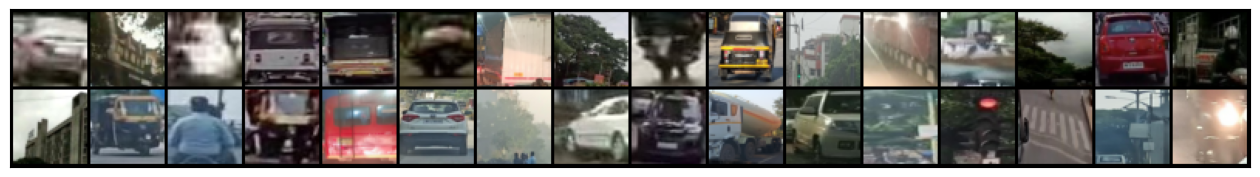

In [6]:
from torchvision.utils import make_grid

def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(train_dl)

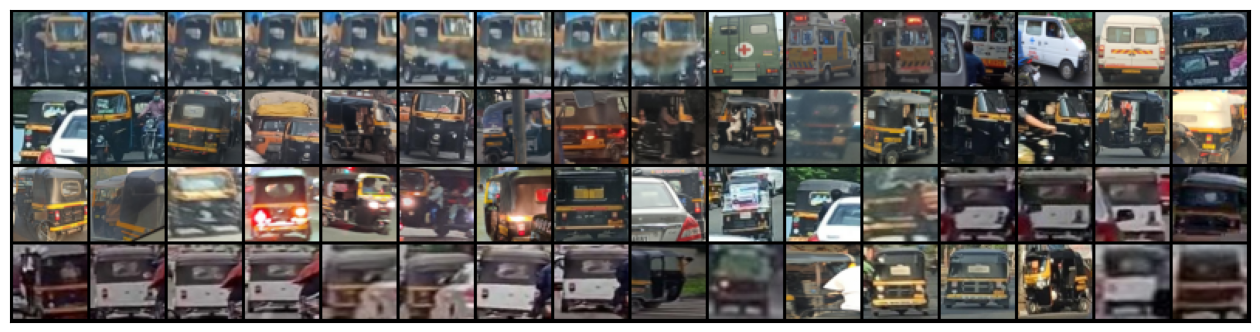

In [7]:
from torchvision.utils import make_grid

def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(val_dl)